<a href="https://colab.research.google.com/github/juliocnsouzadev/deep-learning/blob/simple-regression/simple_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Tensorflow 
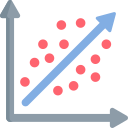

In [20]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.11.0


## Setting seed to maintain reproducibility 

In [21]:
tf.random.set_seed(42)

## Creating a super simple (shitty) model
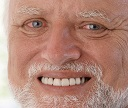

### Creating some data

In [22]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

### 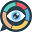 Visualising the Data 

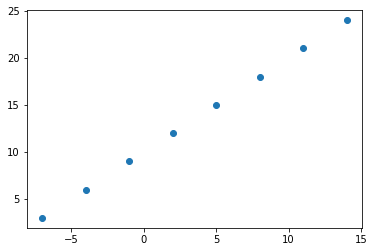

In [23]:
plt.scatter(X,y) 

### The model

In [25]:
# Converting data to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5, verbose=0)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
# not amazing prediction at all... we expected 27 =/
shitty_pred = model.predict([17.0])
shitty_pred

1/1 [==============================] - 0s 67ms/step


array([[-6.376074]], dtype=float32)

### Making the model less shitty

In [31]:
better_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])
better_model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(lr=0.01),
    metrics=["mae"]
)
better_model.fit(tf.expand_dims(X, axis=-1), y, epochs=20, verbose=0)
better_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Some improvement there ;)
better_pred = better_model.predict([17.0])
better_pred

1/1 [==============================] - 0s 74ms/step


array([[29.819908]], dtype=float32)

## Trying a new model with some random data

### Creating some random data

In [35]:
X1 = tf.range(-100, 100,4)
y1 = X1 + 10

### 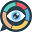 Visualising the Data 

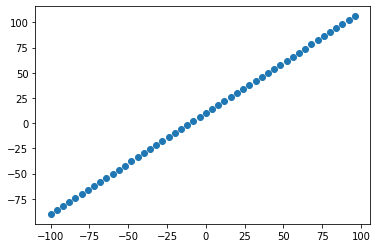

In [36]:
plt.scatter(X1, y1)

### Splitting the data => train / test set

In [38]:
len(X1)

50

In [40]:
X_train = X1[:40]
X_test = X1[40:]

y_train = y1[:40]
y_test = y1[40:]

### 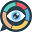 Visualising the Data 

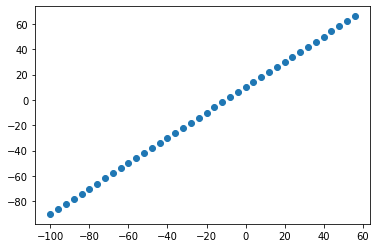

In [41]:
plt.scatter(X_train, y_train)

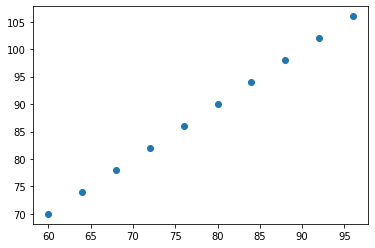

In [42]:
plt.scatter(X_test, y_test)

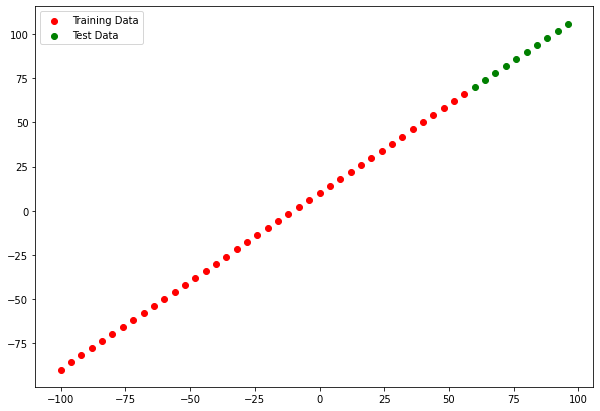

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Test Data')
plt.legend()

### Creating the Model

In [47]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input-layer"), # define the input_shape to our model
  tf.keras.layers.Dense(1, name="output-layer") # define the input_shape to our model
], name="first-model")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

model.summary()

Model: "first-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output-layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### 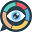 Visualising the model

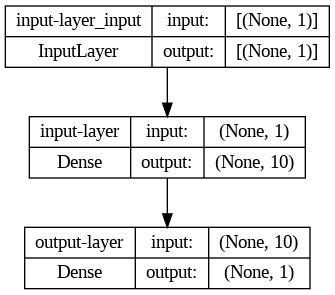

In [48]:
plot_model(model=model, show_shapes=True)

### Making predictions

In [49]:
y_pred = model.predict(X_test)
y_pred


1/1 [==============================] - 0s 65ms/step


array([[ 76.460365],
       [ 81.441154],
       [ 86.42192 ],
       [ 91.40269 ],
       [ 96.383484],
       [101.36426 ],
       [106.34504 ],
       [111.32582 ],
       [116.30661 ],
       [121.28738 ]], dtype=float32)

### 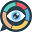 Visualising the Predictions

In [50]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

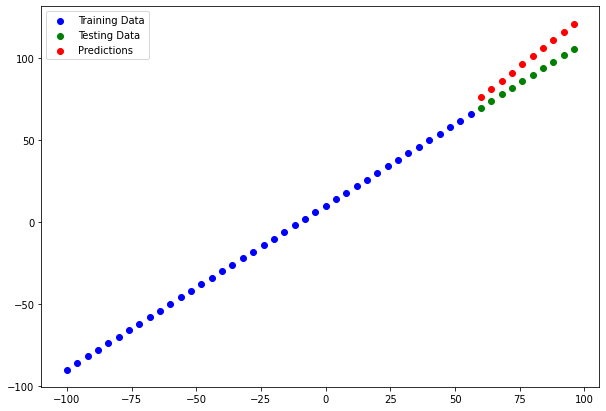

In [51]:
plot_predictions()

### Evaluating the Models 📐

In [52]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 171ms/step - loss: 10.8739 - mae: 10.8739


[10.873873710632324, 10.873873710632324]

In [53]:
# mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred) )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.873872>

In [54]:
# mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=126.17699>

In [55]:
def get_metric(y_true=y_test, y_pred=y_pred, metric="mae"):
    if metric == "mae":
        return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
    if metric == "mse":
        return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
    raise Exception("Invalid metric ", metric)

In [56]:
mae = get_metric()
mse = get_metric(metric="mse")

In [57]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.873872>

In [58]:
mse

<tf.Tensor: shape=(), dtype=float32, numpy=126.17699>